In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#import lec4_graphs as gfx

In [2]:
df = pd.read_csv('qog_std_cs_jan18.csv')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8,6)

In [3]:
import seaborn as sns

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <a list of 10 Patch objects>)

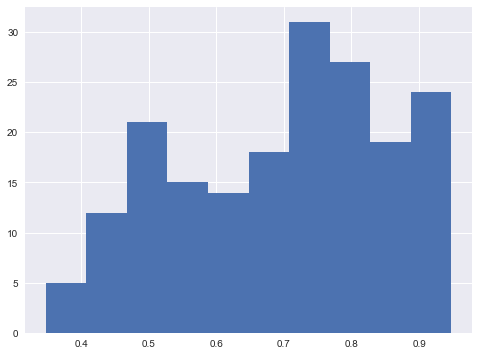

In [4]:
plt.hist(df['undp_hdi'].dropna())

/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribucion del IDH')

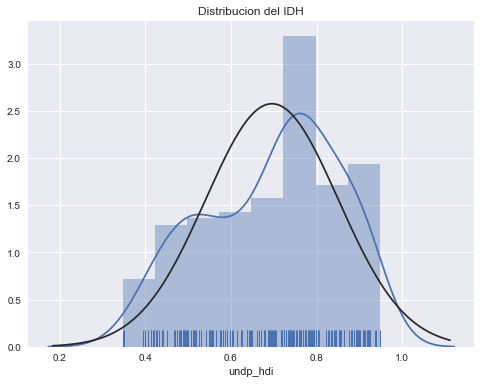

In [5]:
sns.distplot(df['undp_hdi'].dropna(),rug = True, fit=stats.norm)
plt.title('Distribucion del IDH')

In [29]:
df['region_record'] = df['ht_region'].replace([1,2,3,4,5,6,7,8,9,10],
    ['EastEurope','LatAm','NorthAfrica','SubSaharian','WesternDem',"EastAsia","SouthEastAsia",'SouthAsia','Pacific','Car'])

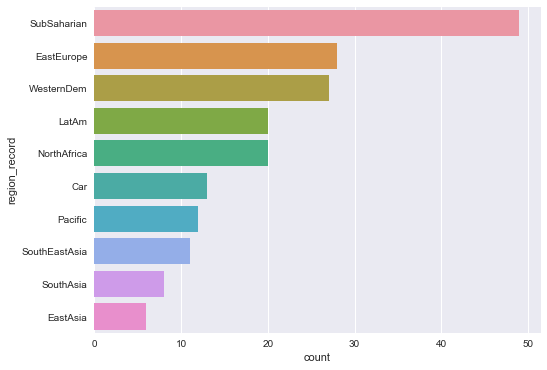

In [7]:
sns.countplot(y=df['region_record'],
             order = df['region_record'].value_counts().index)

In [8]:
df['demo'] = np.where(df['gol_inst']<=2,'Democracia','No Democracia')

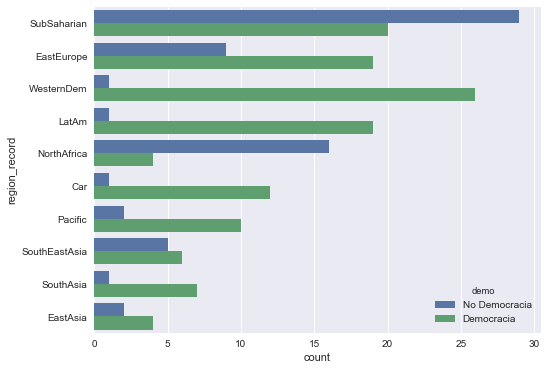

In [9]:
sns.countplot(y=df['region_record'], hue=df['demo'],
             order = df['region_record'].value_counts().index)

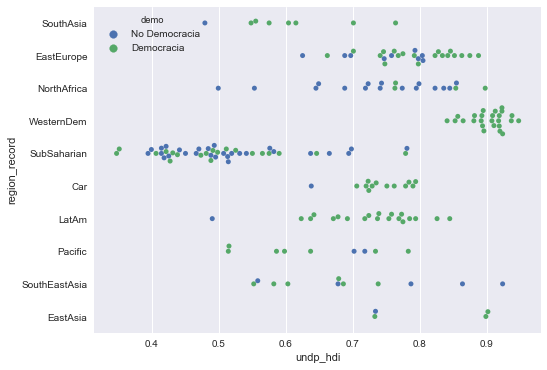

In [10]:
sns.swarmplot(y=df['region_record'],x=df['undp_hdi'], hue=df['demo'])

In [11]:
#gfx.generate_corr_matrix()

In [12]:
wvs_subset = df.filter(regex='wvs_conf*').dropna()

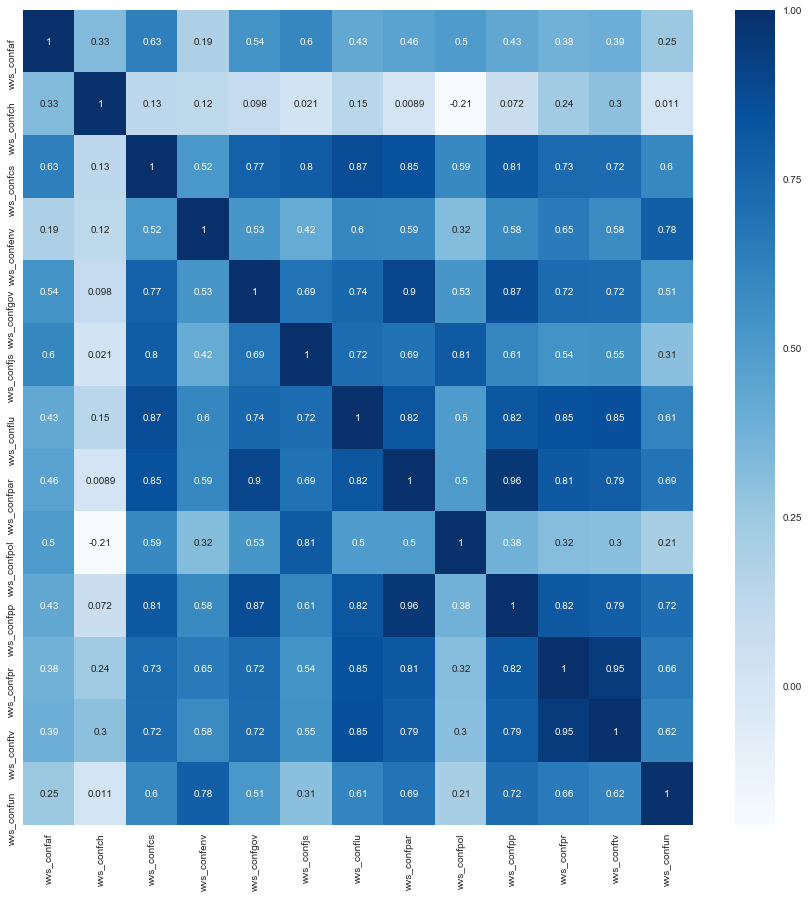

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(wvs_subset.corr(),cmap='Blues', annot=True)

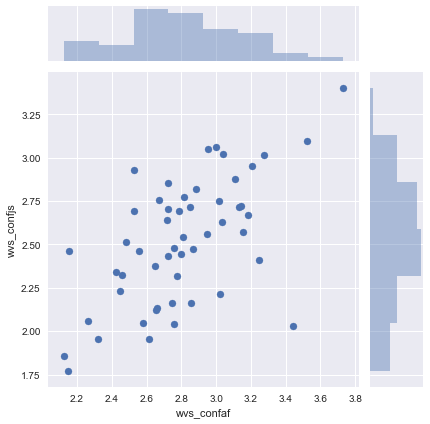

In [14]:
sns.jointplot(wvs_subset['wvs_confaf'],wvs_subset['wvs_confjs'])

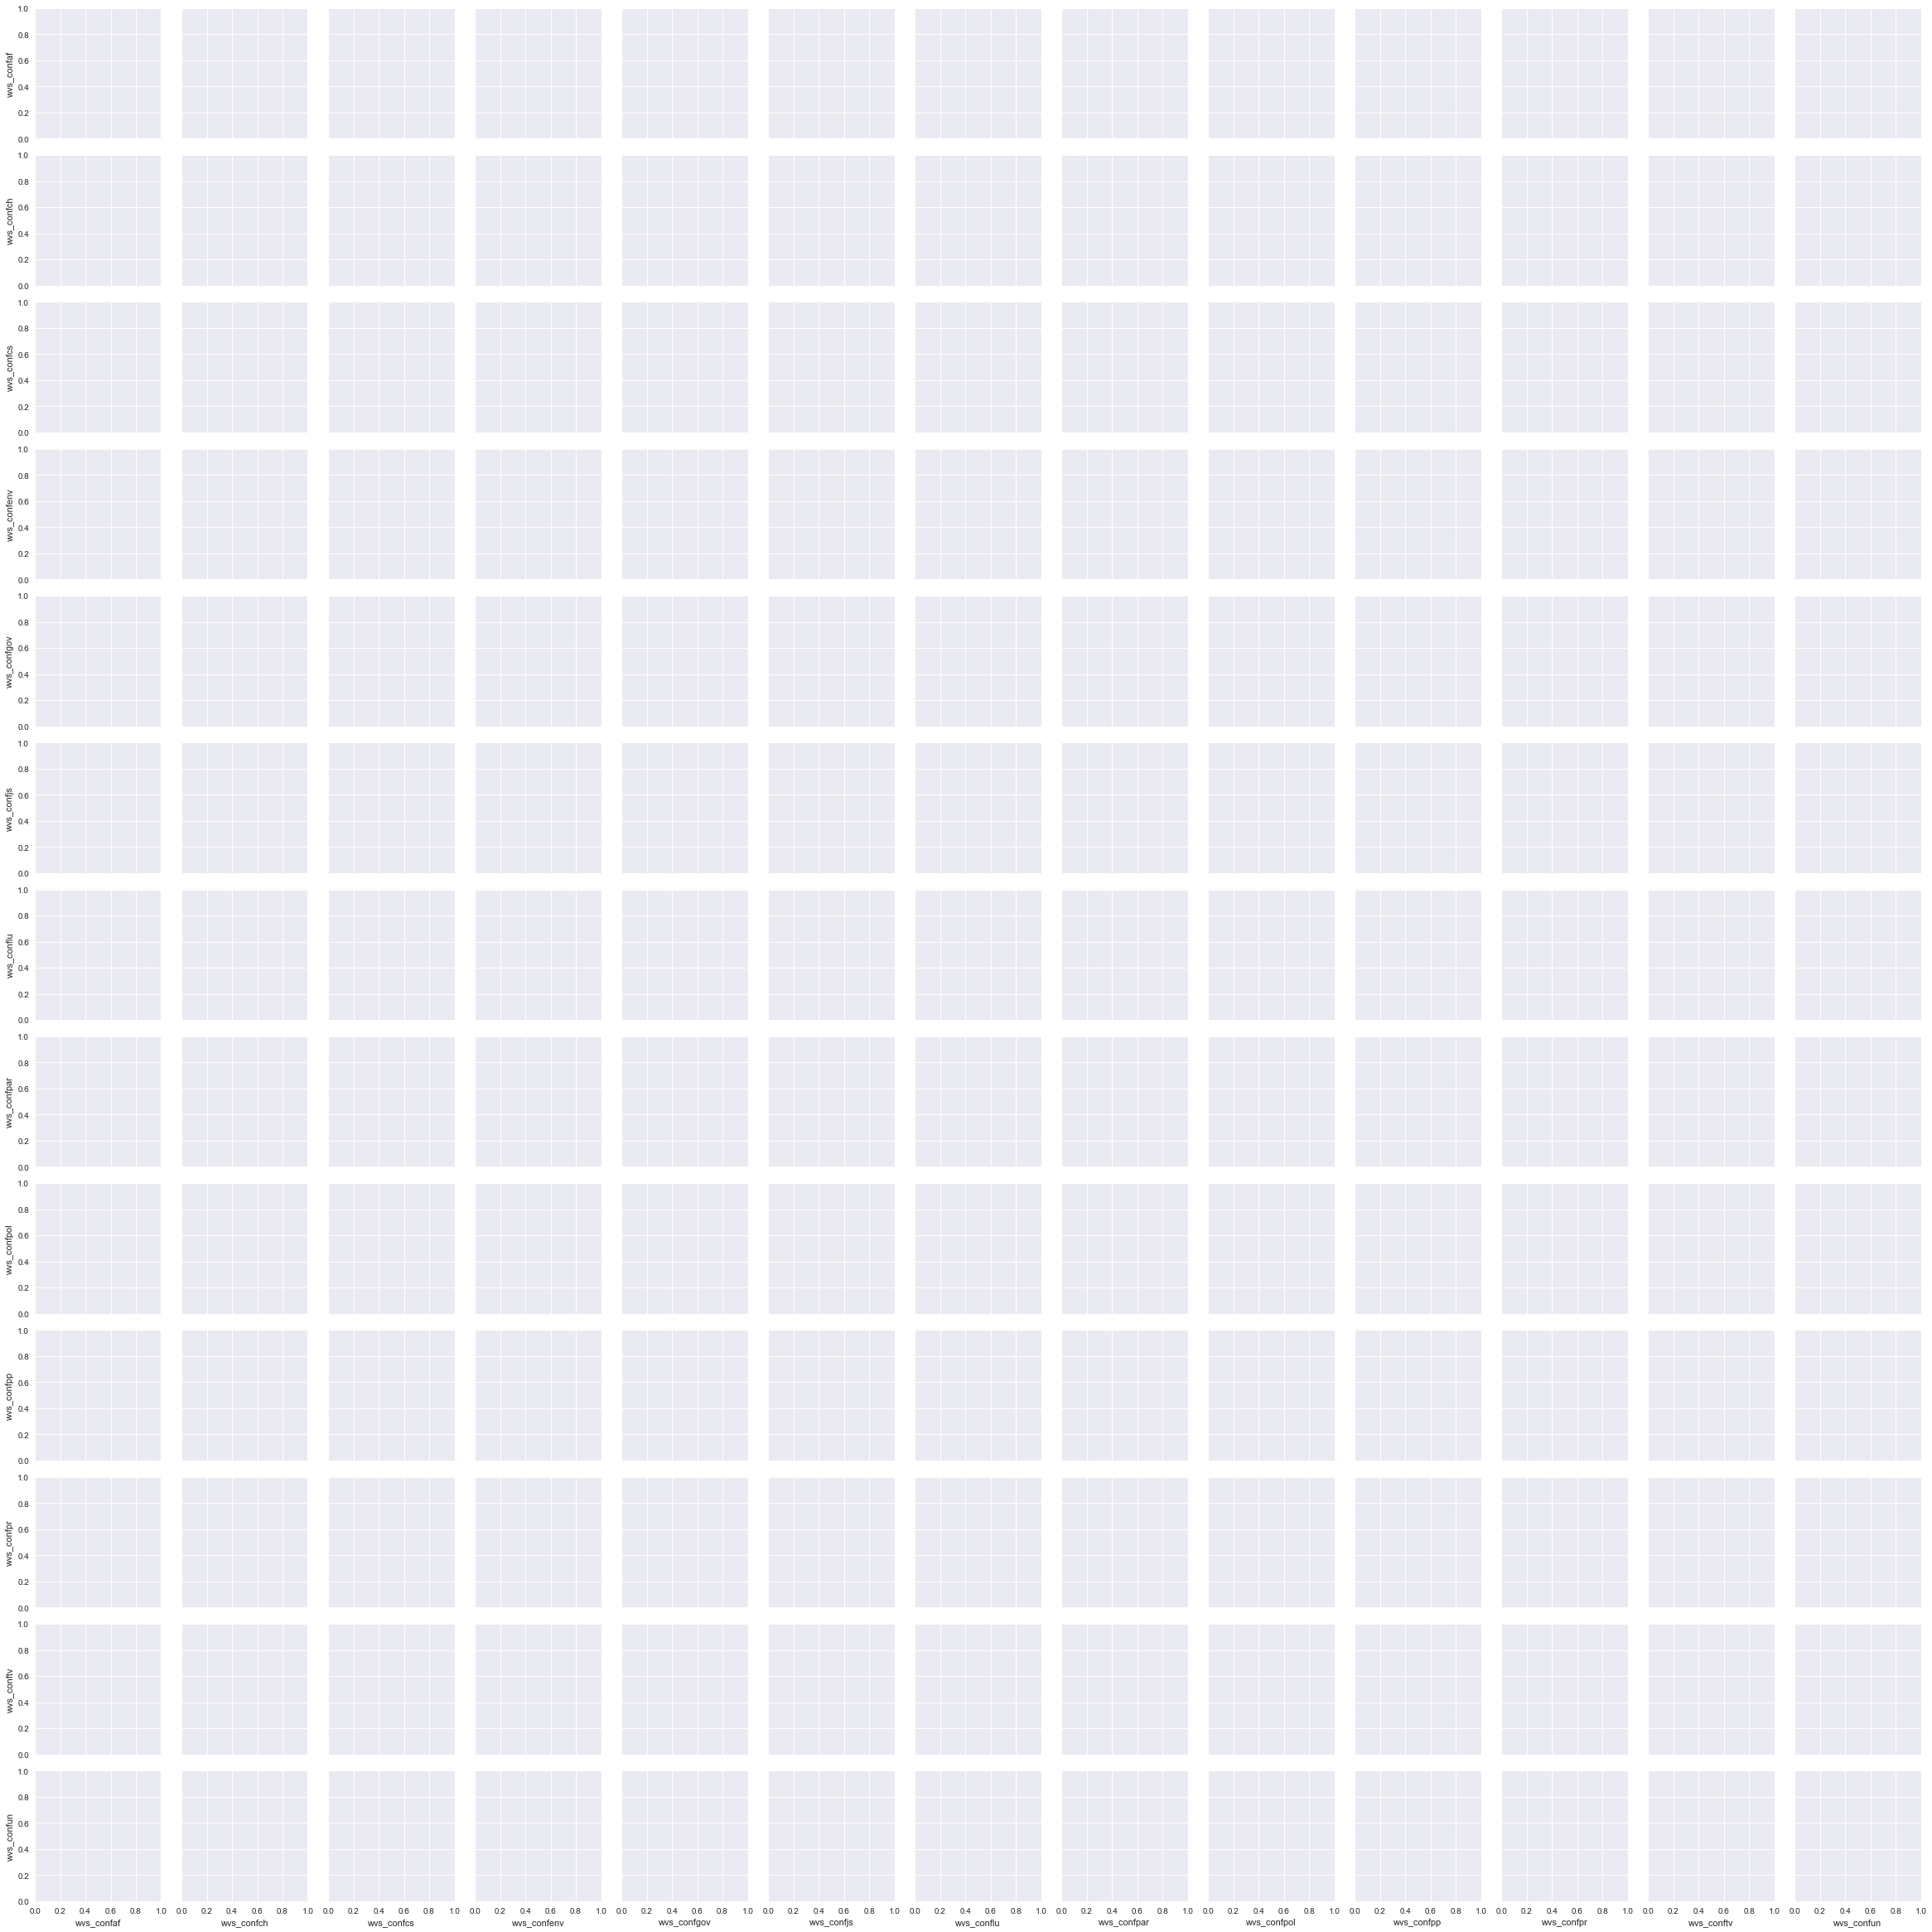

In [15]:
grid = sns.PairGrid(wvs_subset)
#grid = grid.map_diag(sns.distplot)
#grid = grid.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha',.5}, line_kws={'color':'tomato'})

Paso 1: definir hipotesis
-> Hipotesis nula: el nivel de confianza interpresonal no es distinto al criterio propuesto de 0.7 -> hipotesis alternativa: el nivel de confianzada interpersonal es distinto al criterio propuesto de 0,7

In [16]:
df = pd.read_csv('qog_std_cs_jan18.csv')

In [17]:
trust = df['wvs_trust'].dropna()

In [18]:
diff = trust.mean() - .7

In [19]:
diff

-0.46479472043636355

In [20]:
error_std = np.sqrt(np.var(trust,ddof=1) / float(trust.shape[0]))

In [21]:
error_std

0.0219584530263424

In [22]:
diff/error_std

-21.167006613752516

In [23]:
stats.ttest_1samp(trust, .7)

Ttest_1sampResult(statistic=-21.16700661375252, pvalue=8.168825038158067e-28)

# distribucion T

In [42]:
df['western_dm'] = np.where(df['region_record'] == 'WesternDem',1,0)

In [38]:
western_trust = df.query('western_dm==1')['wvs_trust'].dropna()
no_western_trust = df.query('western_dm==0')['wvs_trust'].dropna()

In [39]:
stats.ttest_ind(western_trust,no_western_trust)

Ttest_indResult(statistic=5.258244235094224, pvalue=2.6582316564048346e-06)